In [55]:
import numpy as np 
import pandas as pd

In [56]:
data = pd.read_csv('train.csv')

In [57]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
# Select relevant columns
df = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]
df




,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000
...,...,...,...,...
1455,1647,3,2,175000
1456,2073,3,2,210000
1457,2340,4,2,266500
1458,1078,2,1,142125


In [59]:
# Define X and y variables
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]  # Features
y = df['SalePrice']  # Target variable
X.head, y.head

(<bound method NDFrame.head of       GrLivArea  BedroomAbvGr  FullBath
 0          1710             3         2
 1          1262             3         2
 2          1786             3         2
 3          1717             3         1
 4          2198             4         2
 ...         ...           ...       ...
 1455       1647             3         2
 1456       2073             3         2
 1457       2340             4         2
 1458       1078             2         1
 1459       1256             3         1
 
 [1460 rows x 3 columns]>,
 <bound method NDFrame.head of 0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64>)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Make predictions
y_pred = model.predict(X_test)

In [64]:
# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 2806426667.25
R-squared: 0.63


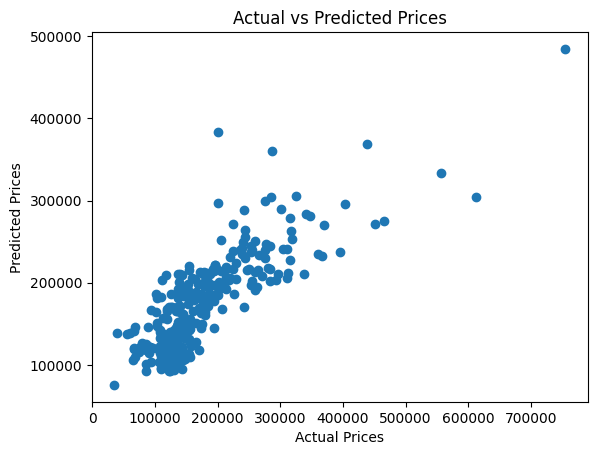

In [65]:
import matplotlib.pyplot as plt

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
